## Abstract Sapientino

Level of abstraction "zero".

The agent can move from any location to any other location.

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


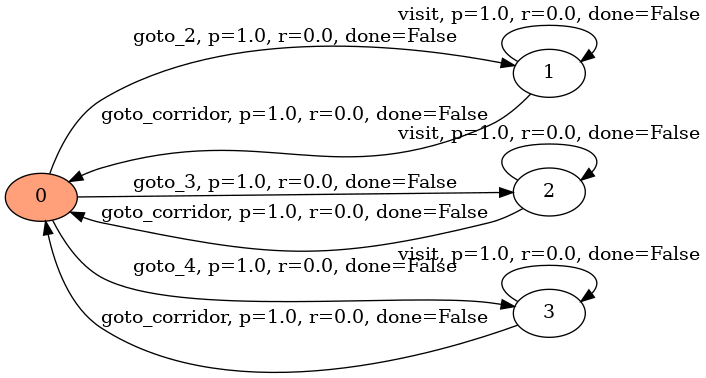

In [1]:
import random
%matplotlib inline

from multinav.algorithms.value_iteration import value_iteration
from multinav.helpers.notebooks import print_env
from multinav.envs.abstract_sapientino import AbstractSapientino
from multinav.helpers.gym import Transitions, Transition

env = AbstractSapientino(3, failure_probability=0.0)
env.reset()
print_env(env)

Do a rollout of a random policy:

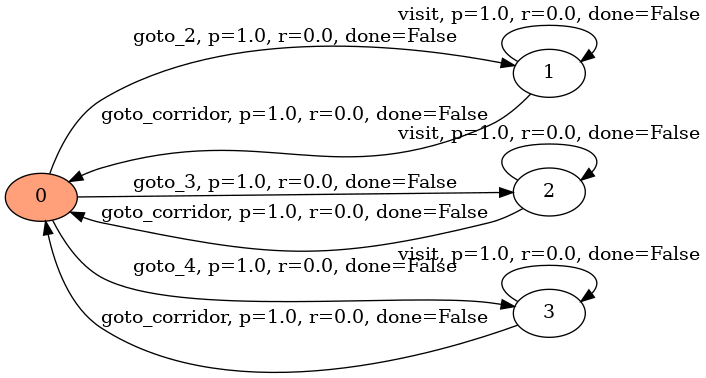

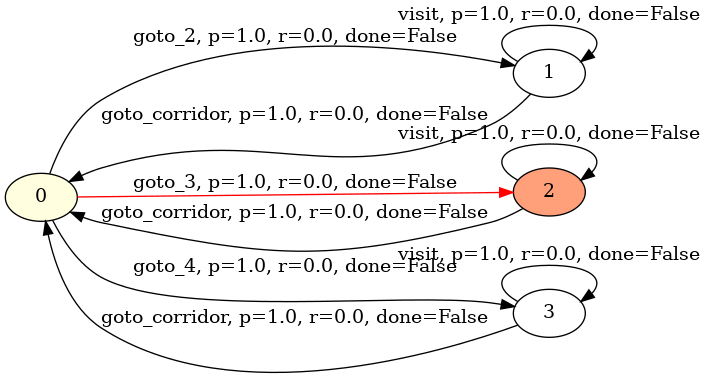

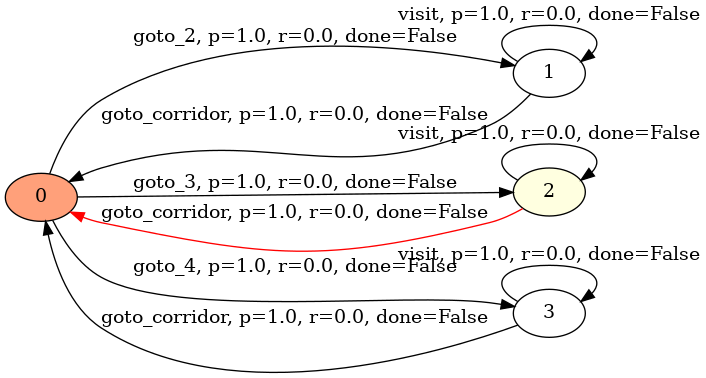

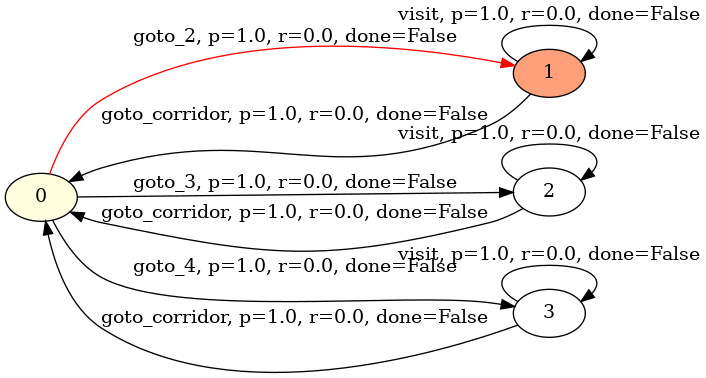

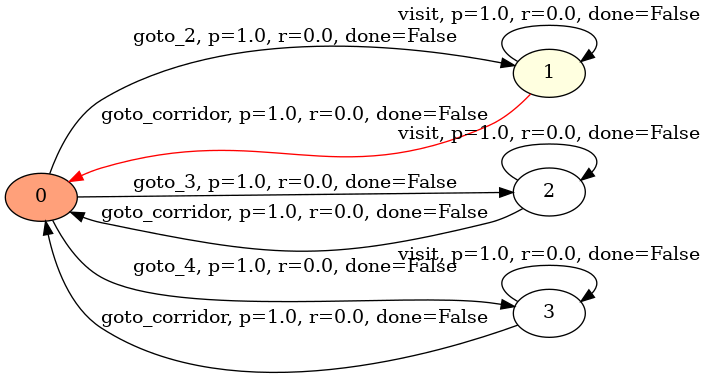

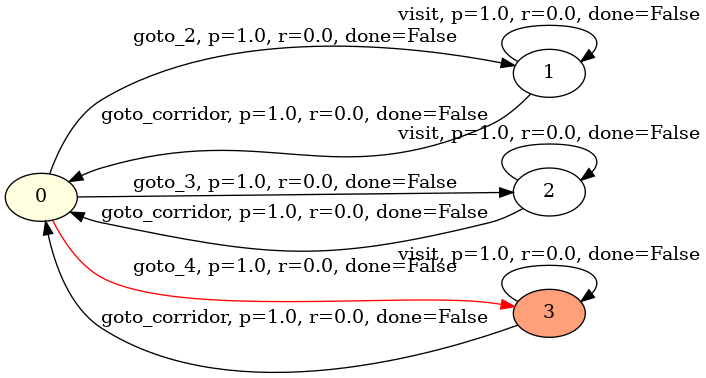

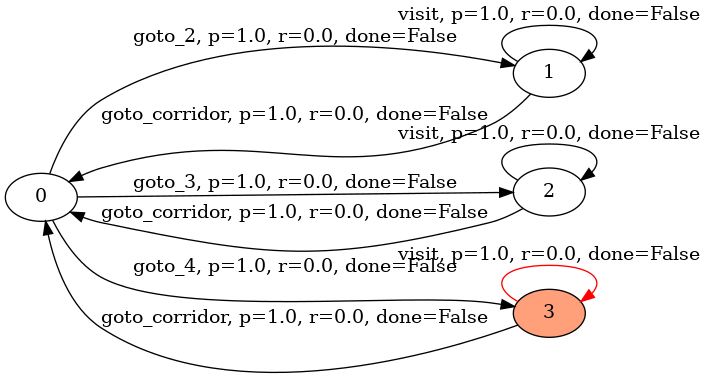

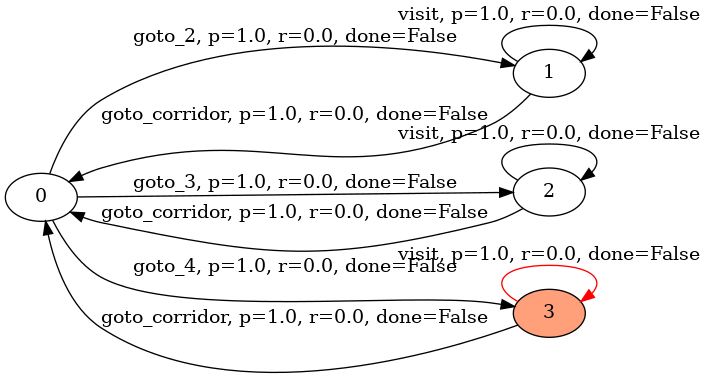

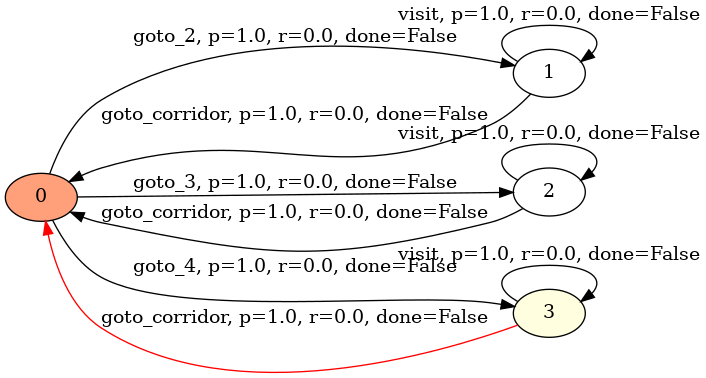

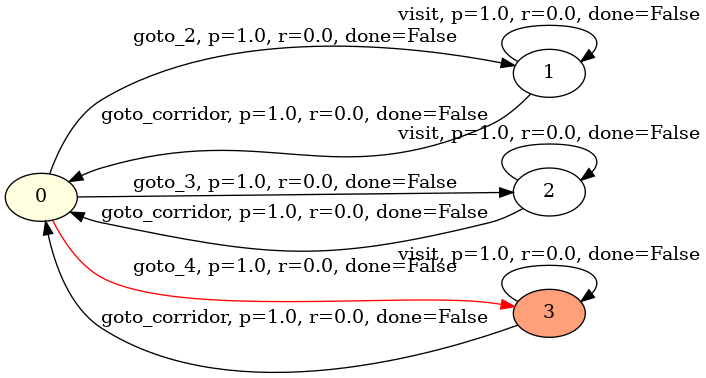

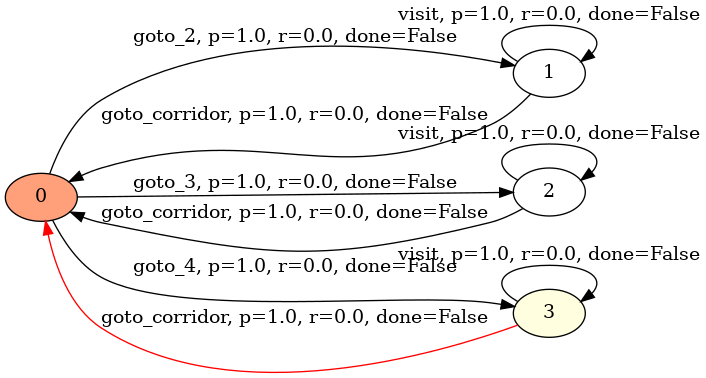

In [2]:
state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state)))
    state, reward, done, info = env.step(action)
    print_env(env)

Let's add a reward if color 3 is visited.

In [3]:
class _reward_wrapper(AbstractSapientino):
    """Add reward when visiting the last color."""

    def _make_transitions(self) -> Transitions:
        result = super()._make_transitions()
        target_color = self.nb_colors - 1
        target_action = self.visit_color

        state = self.state_from_color(target_color)
        transition = result[state][target_action][0]
        new_transition = list(transition)
        new_transition[2] = 1.0
        new_transition_tuple: Transition = tuple(new_transition)  # type: ignore
        result[state][target_action] = [new_transition_tuple]

        return result

env = _reward_wrapper(3, failure_probability=0.0)
v, policy = value_iteration(env, discount=0.9, max_iterations=200)
print(f"Learned value function: {v}")
print(f"Learned policy: {policy}")

Learned value function: defaultdict(<bound method _ValueIteration._random of <multinav.algorithms.value_iteration._ValueIteration object at 0x7ff1bcf15690>>, {0: 8.999999911553305, 1: 8.099999911553306, 2: 8.099999911553306, 3: 9.999999911553305})
Learned policy: {0: 4, 1: 0, 2: 0, 3: 1}
